In [3]:
import pandas as pd
import numpy as np
import cellstates as cs

This notebook shows an example analysis of a dataset with cellstates. We are looking at 1937 pancreatic cells from one human donor. 

### Reference
Baron, M. et al. A Single-Cell Transcriptomic Map of the Human and Mouse Pancreas Reveals Inter- and Intra-cell Population Structure. Cell Syst. 3, 346-360.e4 (2016).

In [4]:
filepath = 'test_data/baron/Gene_table.txt.gz'
df = pd.read_csv(filepath, sep='\t', index_col=0)
df.head()

,human1_lib1.final_cell_0001,human1_lib1.final_cell_0002,human1_lib1.final_cell_0003,human1_lib1.final_cell_0004,human1_lib1.final_cell_0005,human1_lib1.final_cell_0006,human1_lib1.final_cell_0007,human1_lib1.final_cell_0008,human1_lib1.final_cell_0009,human1_lib1.final_cell_0010,...,human1_lib3.final_cell_0731,human1_lib3.final_cell_0732,human1_lib3.final_cell_0733,human1_lib3.final_cell_0734,human1_lib3.final_cell_0735,human1_lib3.final_cell_0736,human1_lib3.final_cell_0737,human1_lib3.final_cell_0738,human1_lib3.final_cell_0739,human1_lib3.final_cell_0740
GeneID,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,4,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A4GALT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAS,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
df.to_csv(filepath, sep='\t')

In [6]:
clusters = np.loadtxt('test_data/baron/optimized_clusters.txt', dtype=np.int)
lmbd = np.loadtxt('test_data/baron/dirichlet_pseudocounts.txt')
hierarchy_df = pd.read_csv('test_data/baron/cluster_hierarchy.tsv', sep='\t')
score_df = pd.read_csv('test_data/baron/hierarchy_gene_scores.tsv', sep='\t')
display(score_df.head())
display(hierarchy_df.head())

,cluster_new,cluster_old,delta_LL,A1BG,A1CF,A2M,A4GALT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,pk
0,26,37,-4.140421,0.002046,0.033631,0.011783,0.007773,0.034776,-0.559480,0.011374,...,0.006628,0.000736,0.001227,0.010065,0.011701,0.033058,0.058753,0.032649,0.034204,-0.194608
1,7,13,-21.066154,-0.006145,-0.018990,0.067171,0.044314,-0.045106,0.049381,0.064839,...,0.005139,-0.004705,-0.007842,-0.019785,-0.001553,-0.115066,-0.715735,-0.125494,-0.069146,0.147324
2,19,44,-22.394298,0.000396,0.006509,0.002280,0.001504,0.006731,0.006224,0.002201,...,0.001283,0.000143,0.000238,0.001948,0.002265,0.006398,0.011371,0.006319,0.006620,0.005606
3,22,50,-23.007094,0.000693,0.011387,0.003989,0.002632,0.011775,0.010888,0.003851,...,0.002244,0.000249,0.000416,0.003408,0.003962,0.011193,-0.241747,0.011054,-0.114862,0.009808
4,34,40,-26.100780,0.003243,-0.257394,-0.292024,0.012323,-0.154951,0.050979,0.018031,...,0.010507,0.001167,0.001946,-0.194123,0.018549,0.052406,0.093140,0.051758,0.054222,0.045920


,cluster_new,cluster_old,delta_LL
0,26,37,-4.140421
1,7,13,-21.066154
2,19,44,-22.394298
3,22,50,-23.007094
4,34,40,-26.100780


In [7]:
data = df.values.astype(np.int)
data.shape

(16016, 1937)

In [8]:
clst = cs.Cluster(data, lmbd, clusters, max_clusters=max(clusters)+1, num_threads=12, n_cache=1000)

# Visualization with PCA

In [64]:
# calculate PCA
from sklearn.decomposition import PCA

n_scale = np.median(data.sum(axis=0))

tpm_data = n_scale*data/data.sum(axis=0)
X = np.log(tpm_data + 1).T
pca = PCA(n_components=16)
pca.fit(X)
X_pca = pca.transform(X)

pca_var = pca.explained_variance_ratio_

Plotting all cells and clusters on PCA quickly looks very messy

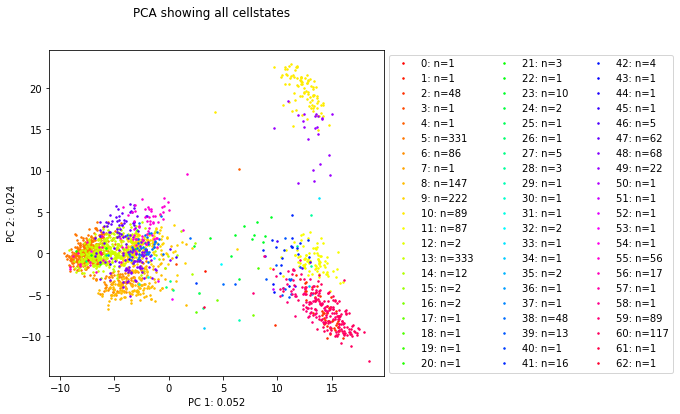

In [65]:
from cycler import cycler
import matplotlib
import matplotlib.pyplot as plt

# define colors
cluster_names = np.unique(clusters)
colors = plt.cm.hsv(np.linspace(0, 1, clst.n_clusters+1))
matplotlib.rcParams['axes.prop_cycle'] = cycler(color=colors)

fig, ax = plt.subplots(1, 1, figsize=(6,6))

# plot first 2 PCA components
c1, c2 = 0, 1
x = X_pca[:, c1]
y = X_pca[:, c2]
for c in cluster_names:
    cond = (clusters==c)
    label = f'{c}: n={np.sum(cond)}'
    ax.plot(x[cond], y[cond], '.', ms=3, label=label)
ax.set_xlabel(f'PC {c1+1}: {pca_var[c1]:.3f}')
ax.set_ylabel(f'PC {c2+1}: {pca_var[c2]:.3f}')
l = plt.legend(ncol=3)
l.set_bbox_to_anchor([1., 1])

fig.suptitle('PCA showing all cellstates')
    
plt.show()

One way we can make this plot tidier is by finding the  **modal gene expression state** of each cluster and only plotting these. 

*NB*: The inferred modal gene expression state of small clusters might be shifted w.r.t. the positions of the cells themselves.

In [69]:
cluster_names = np.unique(clusters)

# find modal gene expression states of all cellstates
all_gene_expression_states = np.vstack([clst.get_expressionstate(c) for c in cluster_names])

log_tpm_states = np.log(all_gene_expression_states*n_scale+1)
X_pca_states = pca.transform(log_tpm_states)

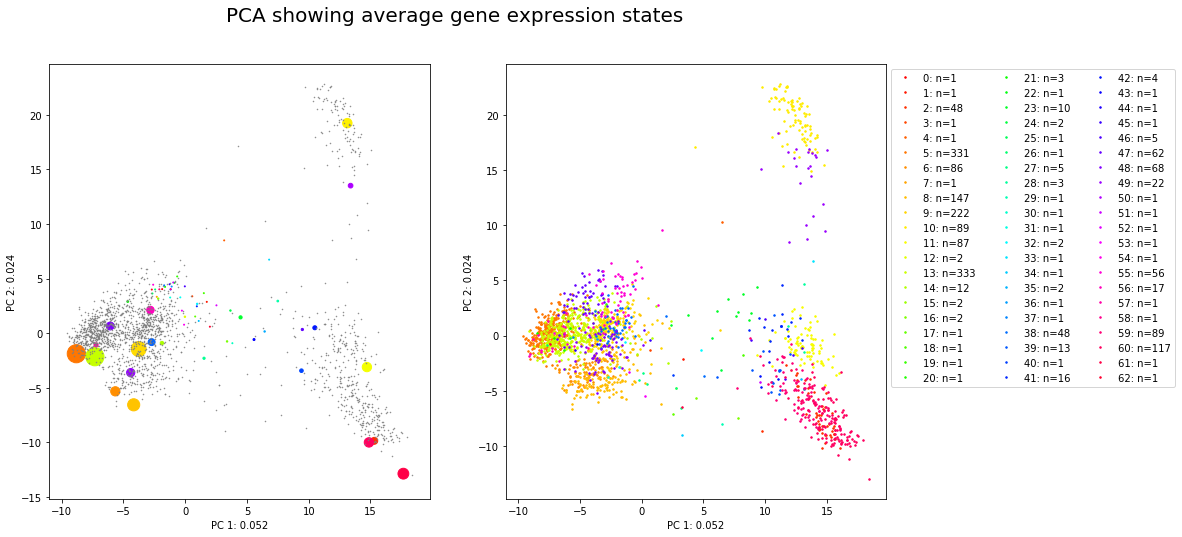

In [135]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8,))

c1, c2 = 0, 1

# plot centres of cellstates
ax = axs[0]
ax.plot(X_pca[:, c1], X_pca[:, c2], '.', ms=1, color='gray')
ax.scatter(X_pca_states[:, c1], X_pca_states[:, c2], 
           s=clst.cluster_sizes, 
           c=np.arange(clst.n_clusters),
          cmap='hsv')
ax.set_xlabel(f'PC {c1+1}: {pca_var[c1]:.3f}')
ax.set_ylabel(f'PC {c2+1}: {pca_var[c2]:.3f}')

# plot previous PCA for comparison
ax = axs[1]
x = X_pca[:, c1]
y = X_pca[:, c2]
for c in cluster_names:
    cond = (clusters==c)
    label = f'{c}: n={np.sum(cond)}'
    ax.plot(x[cond], y[cond], '.', ms=3, label=label)
ax.set_xlabel(f'PC {c1+1}: {pca_var[c1]:.3f}')
ax.set_ylabel(f'PC {c2+1}: {pca_var[c2]:.3f}')
l = plt.legend(ncol=3)
l.set_bbox_to_anchor([1., 1])


fig.suptitle(f'PCA showing average gene expression states', size=20)
plt.show()

Another way to better understand the large-scale structure and get a tidier representation is to look at **merged clusters**:

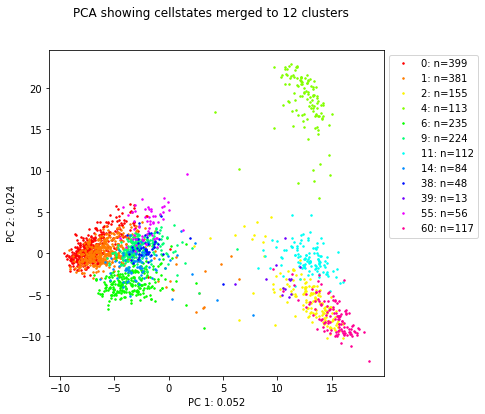

In [136]:

nc = 12 # number of clusters
merged_clusters = cs.clusters_from_hierarchy(hierarchy_df, cluster_init=clusters, steps= - nc + 1)

cluster_names = np.unique(merged_clusters)
colors = plt.cm.hsv(np.linspace(0, 1, nc+1))
matplotlib.rcParams['axes.prop_cycle'] = cycler(color=colors)

fig, ax = plt.subplots(1, 1, figsize=(6,6))

# plot first 2 PCA components
c1, c2 = 0, 1
x = X_pca[:, c1]
y = X_pca[:, c2]
for c in cluster_names:
    cond = (merged_clusters==c)
    label = f'{c}: n={np.sum(cond)}'
    ax.plot(x[cond], y[cond], '.', ms=3, label=label)
ax.set_xlabel(f'PC {c1+1}: {pca_var[c1]:.3f}')
ax.set_ylabel(f'PC {c2+1}: {pca_var[c2]:.3f}')
l = plt.legend(ncol=1)
l.set_bbox_to_anchor([1., 1])

fig.suptitle(f'PCA showing cellstates merged to {nc} clusters')
plt.show()

# Analysis of cluster hierarchy

In [14]:
# I need to properly set the DISPLAY environment to run ete3 on a remote server
# You should probably not run this
import os
os.environ['DISPLAY'] = 'localhost:12.0'  # match to 
!echo $DISPLAY

localhost:12.0


The default ete3 visualization includes all cells as leaves (i.e. horizontal width of clusters correspond to their sizes) and gives a general overview of the data structure. 

*NB*: Cluster colors in the tree do not correspond to the colors of the PCA visualization above.

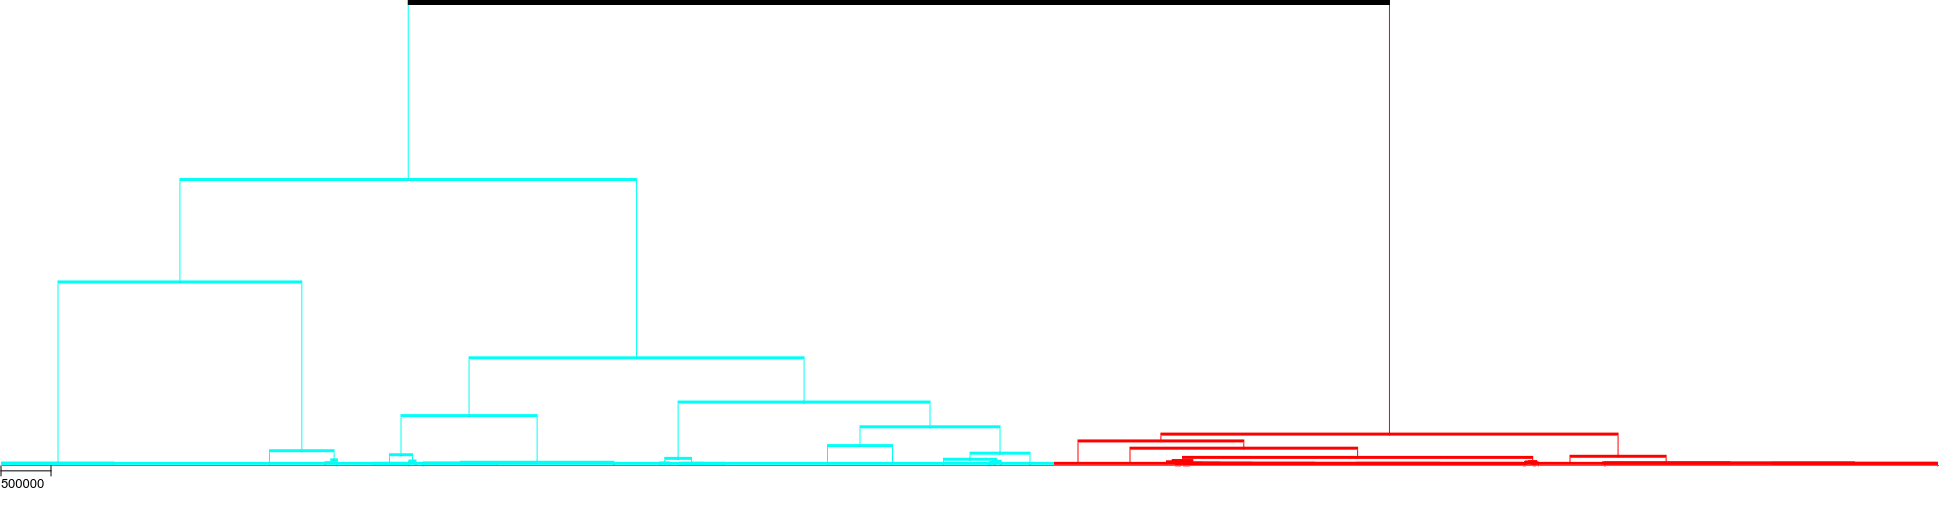

In [139]:
# this built-in function automatically generates a tree visualization with ete3
nc=2
t, ts = cs.plot_hierarchy_ete3(hierarchy_df, clst.clusters, n_groups=nc)
t.render('%%inline', tree_style=ts)

Each of the merges in the tree is associated with genes that are differentially expressed between the two branches. For example, for the last merge we find the following top genes:

In [17]:
gene_scores = score_df.iloc[-1, 4:]
gene_scores.sort_values()

INS        -583.505643
IAPP       -361.350913
TIMP1       -98.579812
COL1A1      -76.016180
RBP4        -68.160869
NEUROD1     -61.006535
CPE         -49.881199
PEG10       -48.142168
DLK1        -40.859173
CHGA        -35.109985
PPP1R1A     -31.213458
GAD2        -29.353429
PCSK1       -28.886095
PCSK1N      -26.425566
GNAS        -25.990776
COL6A1      -25.929404
COL6A2      -24.426410
SLC30A8     -23.470258
COL6A3      -21.348128
SPARC       -18.181429
VGF         -17.896984
PEMT        -17.825584
SYT5        -17.555154
FTH1        -17.098489
BGN         -16.662303
TMOD1       -16.144661
COL1A2      -15.539053
PTPRN       -14.936202
ERO1B       -14.269630
COL3A1      -13.889100
               ...    
IL32          1.634389
MPZL1         1.666737
NR2F2         1.676871
PDK4          1.726969
PRSS3         1.764602
CD99          1.957577
FAM126A       1.997818
CPB1          2.094948
RPL3          2.132052
PNLIP         2.212867
SERPINA3      2.465223
ARHGEF2       2.752426
HSPB1      

The list shows that *INS* is much expressed very differently in both branches while *SST* is expressed more similarly than expected. 

In the original paper, *INS* is marked as a marker gene for Beta cells

In [88]:

my_gene = 'INS'
gene_id = np.argwhere(df.index.values==my_gene)[0,0]
expression = log_tpm_states[:, gene_id]
norm = plt.Normalize(vmin=expression.min(), vmax=expression.max())
cmap = plt.cm.RdBu_r

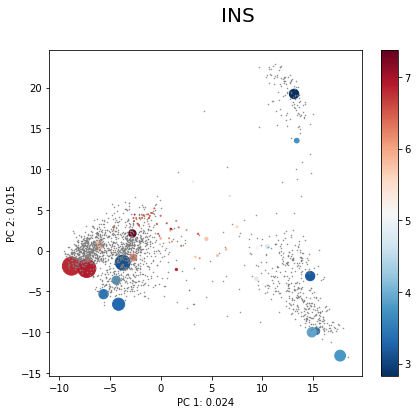

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))

c1, c2 = 0, 1

# plot centres of cellstates
ax.plot(X_pca[:, c1], X_pca[:, c2], '.', ms=1, color='gray')
sc = ax.scatter(X_pca_states[:, c1], X_pca_states[:, c2], 
           s=clst.cluster_sizes, 
           c=expression,
        cmap='RdBu_r')
ax.set_xlabel(f'PC {c1+1}: {pca_var[2*c1+1]:.3f}')
ax.set_ylabel(f'PC {c2+1}: {pca_var[2*c2+1]:.3f}')
plt.suptitle(my_gene, size=20)
plt.colorbar(sc)
plt.show()

It would be interesting to see how this gene is expressed across the tree. For that purpose, we use the ete3 tree plotting library

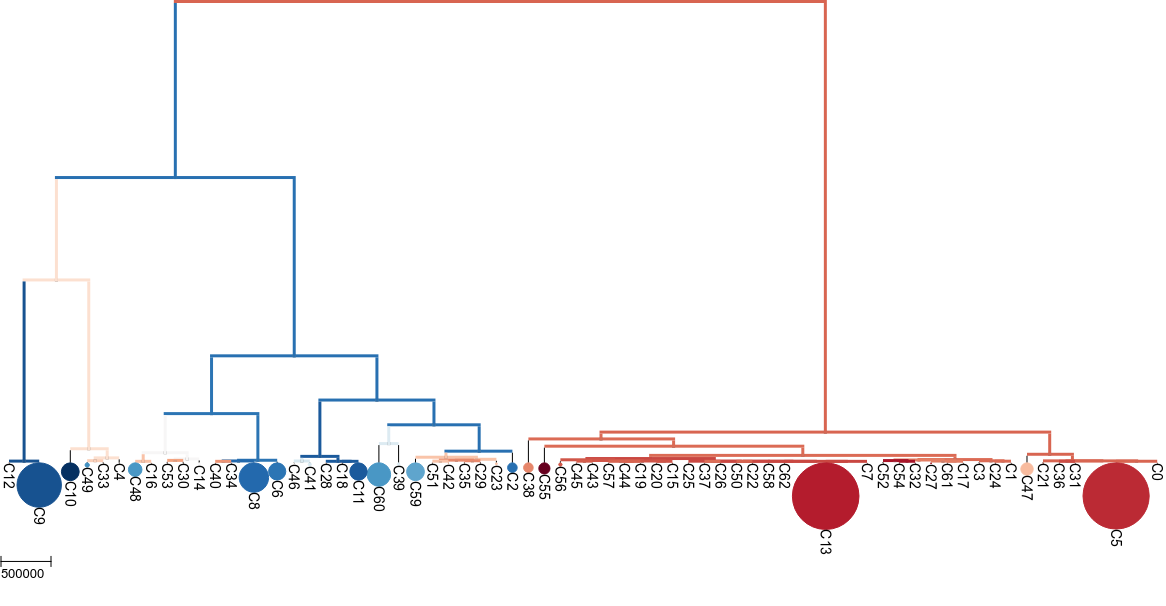

In [131]:
from ete3 import Tree, TreeStyle, NodeStyle

def get_TreeStyle(t, gene_name):
    gene_id = np.argwhere(df.index.values==gene_name)[0,0]
    
    ts = TreeStyle()
    ts.show_leaf_name=True
    ts.scale = 1e-4
    ts.rotation = 90

    # NodeStyle basic settings for all Nodes
    for n in t.traverse():
        style = NodeStyle()

        n.set_style(style)


    # set up colouring of leaves/cellstates which are called C0, C1, ...
    for leaf in t.iter_leaves():
        cluster_id = int(leaf.name[1:])
        # find expression of that gene
        E = np.log(clst.get_expressionstate(cluster_id)[gene_id]*n_scale + 1)
        color = matplotlib.colors.to_hex( cmap(norm(E)) )

        style = NodeStyle()
        # make size proportional to size of cluster
        style['size'] = clst.cluster_sizes[cluster_id]/5

        # make color 
        style['fgcolor'] = color

        leaf.set_style(style)

    # create dummy Cluster object
    clst_dummy = cs.Cluster(data, lmbd, clusters.copy(), max_clusters = clusters.max()+1)

    # Iterate through internal nodes of tree
    n_steps = len(hierarchy_df)
    for i, row in hierarchy_df.iterrows():
        c_new = row.cluster_new
        c_old = row.cluster_old
        # merge clusters
        clst_dummy.combine_two_clusters(c_new, c_old)

        # find expression of gene in new merged cluster
        E = np.log(clst.get_expressionstate(c_new)[gene_id]*n_scale + 1)
        color = matplotlib.colors.to_hex( cmap(norm(E)) )

        node_name = f'I{n_steps-i-1}'
        nodes = t.search_nodes(name=node_name)
        if nodes:
            node = nodes[0]
            style = NodeStyle()
            style["vt_line_color"] = color
            style["hz_line_color"] = color
            style['vt_line_width'] = 3
            style['hz_line_width'] = 3
            style['size'] = 0
            node.set_style(style)
    return ts

# generate Tree
# For simplicity, we will from now on show cellstates as leaves, not cells
newick_string = cs.hierarchy_to_newick(hierarchy_df, clst.clusters, cell_leaves=False)
t = Tree(newick_string, format=1)
ts = get_TreeStyle(t, my_gene)

t.render('%%inline', tree_style=ts)

Let's try a few different genes - all are marker genes from the original paper

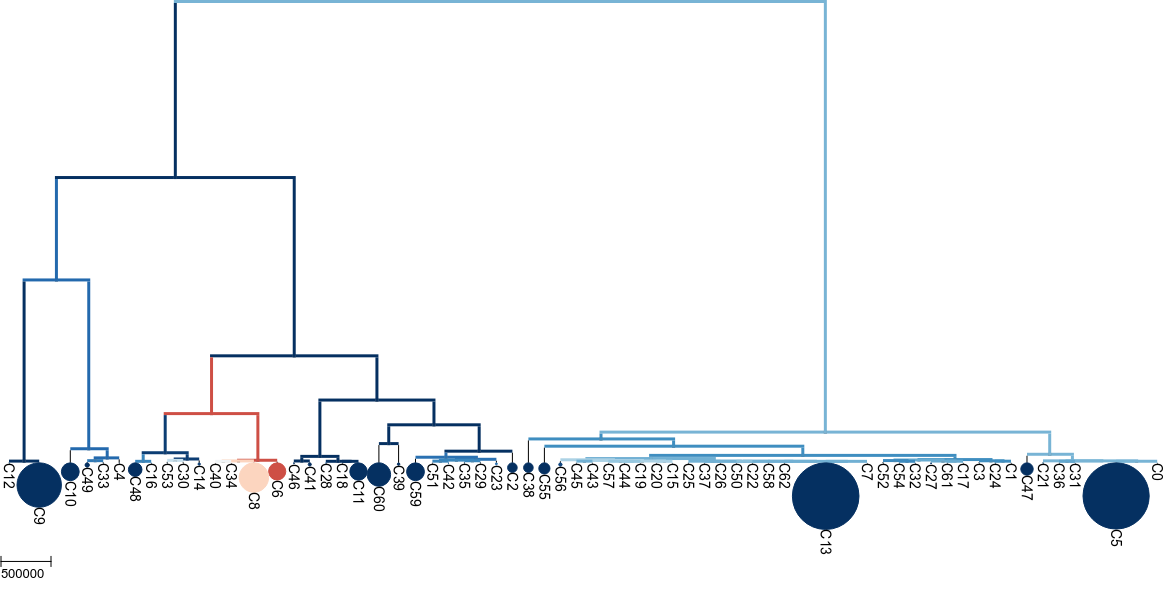

In [115]:
# Alpha (GCG)
ts = get_TreeStyle(t, 'GCG')
t.render('%%inline', tree_style=ts)

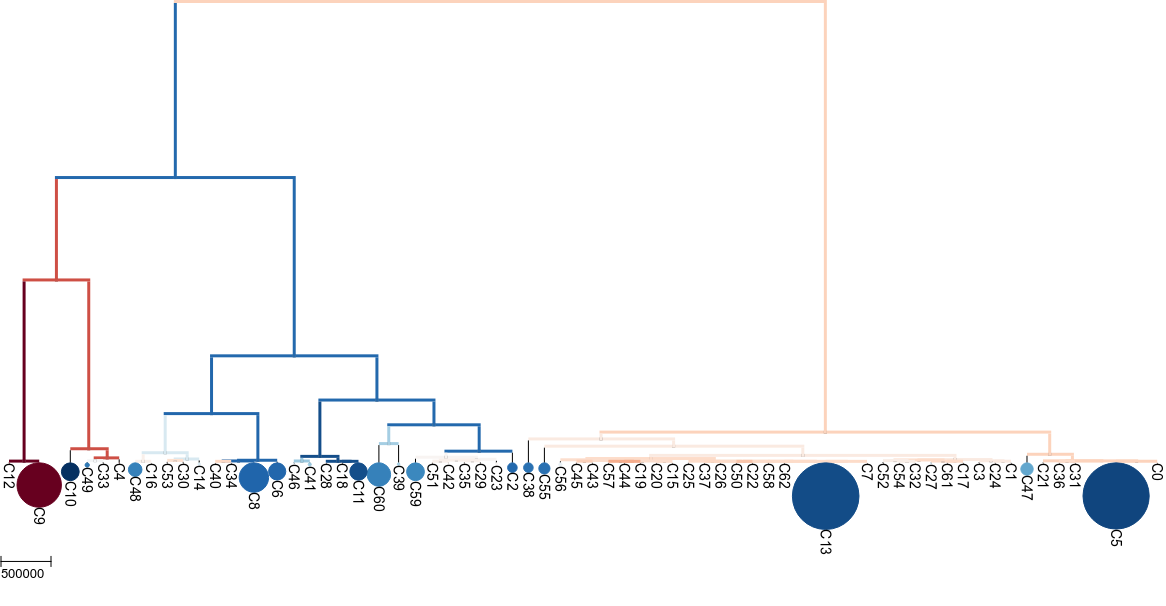

In [114]:
# Delta (SST)
ts = get_TreeStyle(t, 'SST')
t.render('%%inline', tree_style=ts)

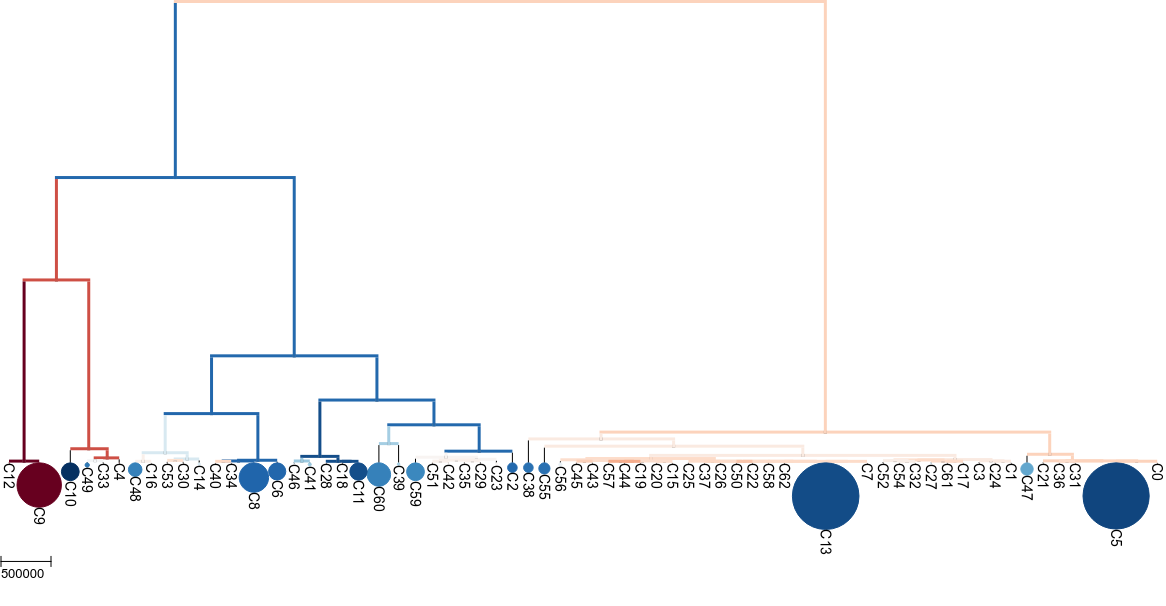

In [116]:
# Gamma (PPY)
ts = get_TreeStyle(t, 'SST')
t.render('%%inline', tree_style=ts)

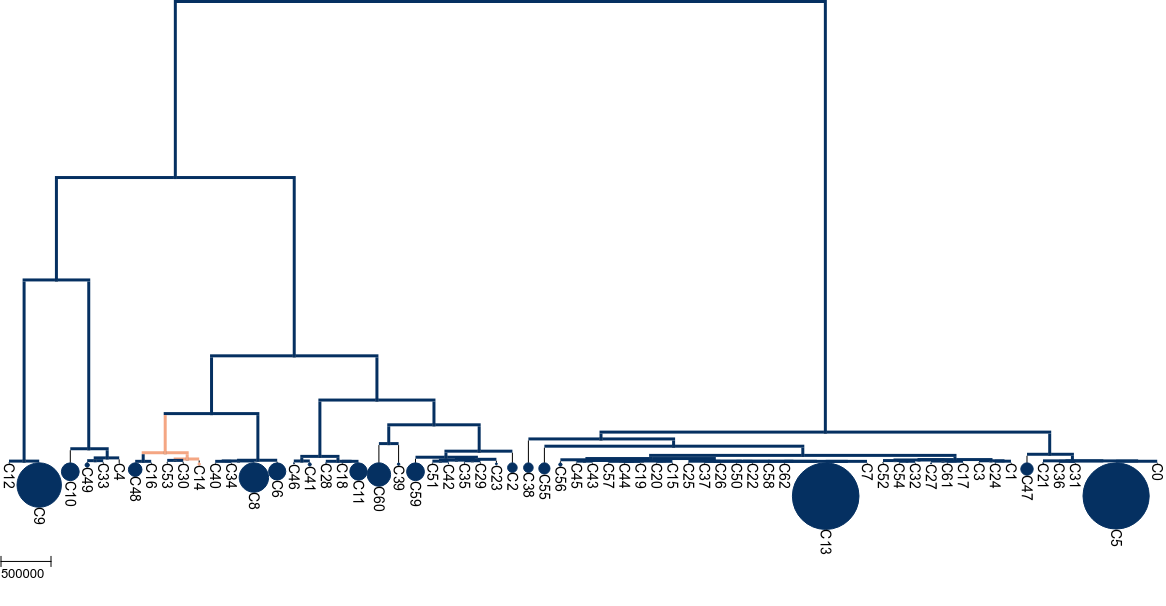

In [117]:
# Epsilon (GHRL)
ts = get_TreeStyle(t, 'GHRL')
t.render('%%inline', tree_style=ts)

We can also easily look at parts of the tree - for example to examine the transcriptional diversity in *INS* expressing beta cells. The first split therein divides cluster labels 1 and 0. 

In [124]:
hierarchy_df.tail(10)

,cluster_new,cluster_old,delta_LL
52,39,60,-2.586377e+04
53,1,38,-4.669235e+04
54,0,1,-6.829872e+04
55,2,39,-7.298716e+04
56,6,14,-1.120241e+05
57,2,11,-1.355214e+05
58,2,6,-4.422420e+05
59,4,9,-7.587676e+05
60,2,4,-1.024143e+06
61,0,2,-1.760324e+06


In [129]:
# first check out interesting genes
n_steps = len(hierarchy_df)
merge_id = 54
gene_scores = score_df.iloc[merge_id, 4:]
gene_scores.sort_values()

IAPP       -22.894024
NEUROD1     -9.050794
RBP4        -7.658603
MMP7        -7.030888
DLK1        -6.576803
S100A6      -6.468544
ANXA2       -6.066348
TMSB4X      -4.840897
TACSTD2     -4.223913
CHGA        -4.131706
FTH1        -4.061002
S100A11     -3.741355
B2M         -3.464947
CPE         -3.144335
KRT7        -2.929924
SLC30A8     -2.902648
RAB2A       -2.889390
PCSK1       -2.888564
TMOD1       -2.589706
RRP12       -2.540650
PCGF3       -2.523332
SYT5        -2.465137
H3F3A       -2.389987
PGK1        -2.217674
SUPT20H     -2.116992
TTC14       -2.094831
MOB4        -2.062480
QPCT        -2.024652
PURA        -1.980962
PCDH17      -1.874342
              ...    
RRNAD1       1.683888
COBLL1       1.684030
SH3BGRL3     1.716938
SECISBP2     1.726237
CCNT2        1.729589
PLA2G1B      1.744491
SOCS2        1.828563
ELMO3        1.969743
SLC25A13     1.979133
CXorf40A     1.985367
USP36        1.993399
BRD7         2.025839
CPA1         2.101684
GNG7         2.119031
CLPS      

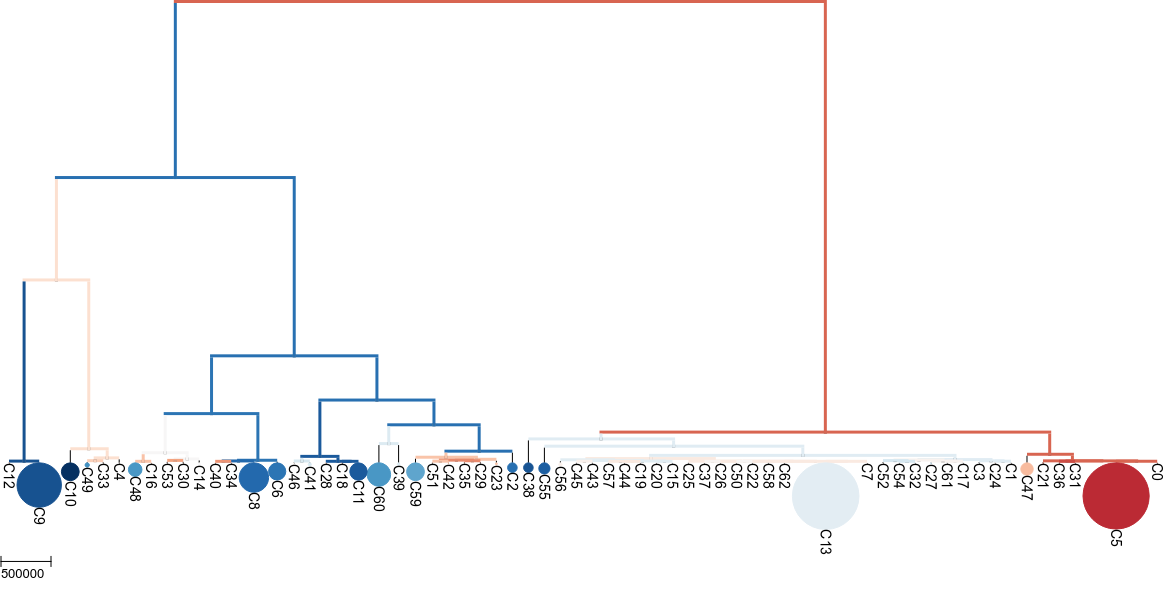

In [133]:
branch = t.search_nodes(name=f'I{n_steps-merge_id}')[0]
ts = get_TreeStyle(branch, 'IAPP')
t.render('%%inline', tree_style=ts)

In [127]:
n_steps-split_id

8

In [153]:
try:
    import cdfe
except Exception as e:
    display(e)

ModuleNotFoundError("No module named 'cdfe'")